In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def alarm_generate(x, var_list):
    '''alarm_generate is a function when return a vector '''
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
  
    if var_list["type_var"] == 'high':
        for i in np.arange(len(x)):
            if x[i] > var_list["limit"]:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

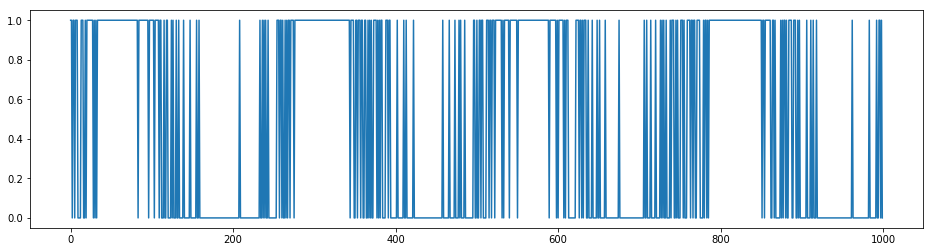

In [66]:
var_list = {
    "limit": 1,
    "type_var":'high', 
    "delay_time" : 10*3/10000, 
    "dead_band_delay" : 10*3/10000
}

t = np.linspace(0, 50, 1000)
ruido = np.random.uniform(-1,1,1000)
x = np.sin((t)*.5)+1+ruido 

log = alarm_generate(x,var_list)
plt.figure(figsize=(16,4))
plt.plot(log)
#plt.plot(x)

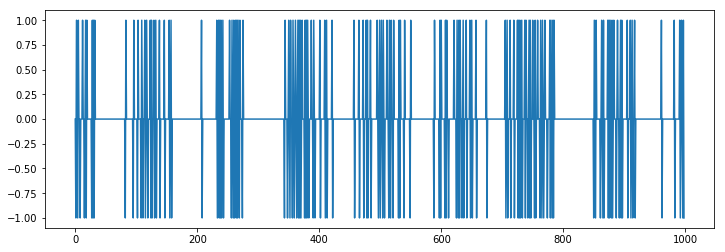

In [71]:
plt.figure(figsize=(12,4))
plt.plot(np.diff(log))

In [73]:
leng = np.diff(log)
run_act = np.clip(leng,0,1)

In [75]:
run_lengths = []
count = 0
for i in np.arange(len(run_act)):
    if run_act[i] == 0:
        count+=1
    else:
        if count != 0:
            run_lengths.append(count)
            count = 0
        else:
            pass

In [77]:
run_lengths
print(run_lengths)
print(len(run_lengths))
print(max(run_lengths))

[2, 2, 6, 4, 1, 8, 1, 1, 50, 12, 6, 5, 4, 2, 5, 1, 3, 2, 5, 7, 7, 2, 49, 24, 2, 1, 1, 2, 10, 3, 2, 2, 1, 1, 2, 4, 68, 5, 2, 3, 3, 3, 1, 1, 2, 4, 1, 1, 5, 3, 9, 7, 2, 8, 35, 7, 6, 4, 1, 4, 10, 3, 2, 2, 5, 3, 2, 3, 8, 1, 6, 9, 38, 8, 1, 6, 1, 11, 4, 2, 1, 4, 4, 5, 2, 6, 16, 30, 2, 4, 5, 5, 1, 1, 2, 4, 1, 4, 1, 3, 3, 3, 4, 2, 3, 7, 1, 2, 1, 65, 2, 8, 2, 6, 1, 1, 2, 2, 5, 4, 1, 8, 4, 2, 3, 43, 20, 8, 2, 2]
130
68


In [78]:
a = run_lengths
unique_elements, counts_elements = np.unique(a, return_counts=True)
Pr = []
# for i in np.arange(len(x[0])):
#         Pr.append(x[0][i]/sum(x[0]))
Pr = counts_elements/sum(counts_elements)
        
chat_Index = sum(Pr/unique_elements)
    
print(unique_elements)
print()
print(counts_elements)
print()
print(Pr)
print()
print(chat_Index)

[ 1  2  3  4  5  6  7  8  9 10 11 12 16 20 24 30 35 38 43 49 50 65 68]

[26 29 14 15 10  7  5  7  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1]

[0.2        0.22307692 0.10769231 0.11538462 0.07692308 0.05384615
 0.03846154 0.05384615 0.01538462 0.01538462 0.00769231 0.00769231
 0.00769231 0.00769231 0.00769231 0.00769231 0.00769231 0.00769231
 0.00769231 0.00769231 0.00769231 0.00769231 0.00769231]

0.4200401952852704


(array([86., 40., 13., 10.,  6.,  3.,  4.,  1.,  1.,  2.,  0.,  0.,  1.,
         4.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 <a list of 24 Patch objects>)

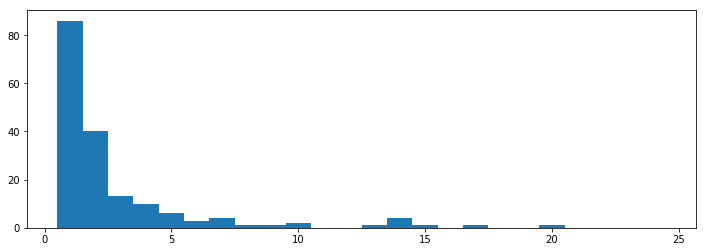

In [44]:
a = run_lengths
plt.figure(figsize=(12,4))
plt.hist(a,x[1]-.5)
#plt.grid(True)